## Week2. Optimization problems & Rydberg atom arrays - Task 1 (optimal $p$)

-----
Among the annealing schedule functions used in Task1,
we investigate the optimal value of p that finds the answer to the given problem with the lowest number of steps and high probability.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Week2_Rydberg_Atoms.draw_graph import draw_graph
from Week2_Rydberg_Atoms.utils import sanity_check
from abstract_udmis import AbstractUDMIS

%matplotlib inline


In [2]:
class UDMIS(AbstractUDMIS):
    def __init__(self, u, graph):
        super().__init__()
        self.u, self.graph = u, graph
        self.num_vertices = len(self.graph)
        print(self.num_vertices)
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)
        
        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph
                
                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True
                    
        return edges
        
    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        for i in range(self.num_vertices-1):
            for j in range(i+1, self.num_vertices):
                
                # check if there is an edge
                if self.edges[i,j]:
                    interaction_term += self.occupations[i]*self.occupations[j]
                
            vertex_term += self.occupations[i]
        
        # missed the last vertex
        vertex_term += self.occupations[self.num_vertices-1]
    
        return u*interaction_term - vertex_term

    def energy_diff(self, i):
        connections = np.where(self.edges[i,:])[0]
        num_adjacent_occupied = sum(self.occupations[connections])
        
        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied
        
        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied 

        return interaction_term_change + vertex_term_change
    
    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices)        

In [3]:
u = 1.35
graph = [(0.3461717838632017, 1.4984640297338632),
        (0.6316400411846113, 2.5754677320579895),
        (1.3906262250927481, 2.164978861396621),
        (0.66436005100802, 0.6717919819739032),
        (0.8663329771713457, 3.3876341010035995),
        (1.1643107343501296, 1.0823066243402013)
       ]

udmis = UDMIS(u, graph)

6


In [4]:
def Task1_err(N, val):
    t = np.arange(N+1)
    T_i = 100
    T_f = 0.01
    T = T_i * ((T_f/T_i) ** ((t/N) ** val))

    N_it = 1000
    E_l = list(range(N_it))
    M = list(range(N_it))

    for j in range(N_it):
        for t in range(N+1):
            temp = T[t]
            E = udmis.mc_step(T=temp)
            if t == N:
                num_violated, num_vertices = sanity_check(graph, answer=udmis.occupations, radius=0.5)
                if num_violated != 0 or num_vertices != 3:
                    M[j] = 0
                else:
                    M[j] = 1

    return sum(M)/N_it

100%|██████████| 100/100 [3:19:09<00:00, 119.50s/it] 


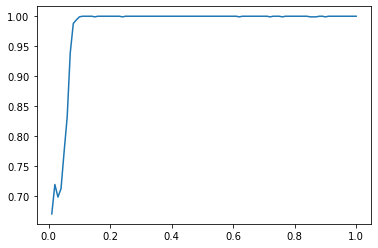

소요시간 : 11950.126556158066 sec


In [5]:
import time
from tqdm import tqdm

start_time = time.time()

val_1 = list(range(100))
for i in tqdm(range(100)):
    val_1[i] = Task1_err(1000, 1-(1/100)*i)


x = np.arange(100)
fac = [1-(1/100)*i for i in range(100)]
values = [val_1[i] for i in range(100)]


ax = plt.plot(fac, values)
plt.show()


print("소요시간 : %s sec" % (time.time() - start_time))




100%|██████████| 100/100 [2:05:39<00:00, 75.40s/it] 


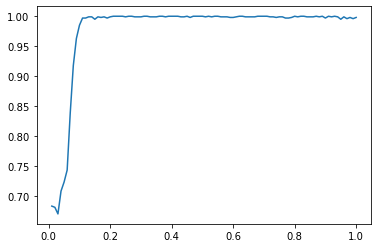

소요시간 : 7539.84490442276 sec


In [7]:
import time
from tqdm import tqdm

start_time = time.time()

val_2 = list(range(100))
for i in tqdm(range(100)):
    val_2[i] = Task1_err(500, 1-(1/100)*i)


x = np.arange(100)
fac = [1-(1/100)*i for i in range(100)]
values = [val_2[i] for i in range(100)]


ax = plt.plot(fac, values)
plt.show()


print("소요시간 : %s sec" % (time.time() - start_time))


100%|██████████| 100/100 [34:29<00:00, 20.70s/it]


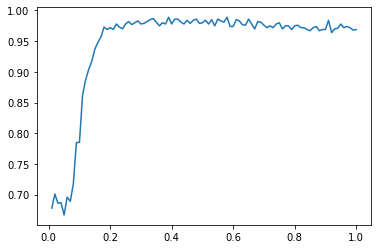

소요시간 : 2070.0760288238525 sec


In [8]:
import time
from tqdm import tqdm

start_time = time.time()

val_3 = list(range(100))
for i in tqdm(range(100)):
    val_3[i] = Task1_err(100, 1-(1/100)*i)


x = np.arange(100)
fac = [1-(1/100)*i for i in range(100)]
values = [val_3[i] for i in range(100)]


ax = plt.plot(fac, values)
plt.show()


print("소요시간 : %s sec" % (time.time() - start_time))









